# 규제 연습

<img src='logo2.png'><br>
* ref : https://www.kaggle.com/vikrishnan/boston-house-prices?select=housing.csv

<img src="logo.png">

In [1]:
### 506rows * 14cols DataFrame 생성

In [2]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')


# from sklearn.linear_model import LogisticRegression ###---(분류 주의주의)
# -------------------------------------------------
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
# from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
# from xgboost import XGBClassifier
from xgboost import XGBRegressor
# from lightgbm import LGBMClassifier
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor



from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error  #잔차(실값-예측값) 제곱 합의 평균
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score
from scipy.stats import skew, kurtosis  #왜도(skew):좌우치우침    첨도(kurt):중앙값의뾰족함정도

from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV    # =StratifiedKFold 회귀에선 사용불가

sns.set()

# Data load

In [3]:
dataset = load_boston()

In [4]:
dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
df = pd.DataFrame(data=dataset['data'], columns=dataset['feature_names'])
df['target'] = dataset['target']

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
df.to_csv("toy_boston_houseprice.csv", index=False)

#  EDA

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


<pre>
crim	자치시(town)별 1인당 범죄율
zn	25,000 평방 피트를 초과하는 거주지역의 비율
indus	비소매상업지역이 차지하고 있는 토지의 비율
chas	찰스강의 경계에 위치한 경우는 1, 아니면 0
nox	10ppm 당 농축 일산화질소
rm	주택 1가구당 평균 방의 수
age	1940년 이전에 건축한 소유주택 비율
dis	보스톤 직업센터까지의 접근성 지수
rad	방사형 도로까지의 접근성 지수
tax	10,000 달러당 재산세율
ptratio	자치시(town)별 학생/교사 비율
b	자치시(town)별 흑인의 비율
lstat	모집단의 하위 계층의 비율
</pre>

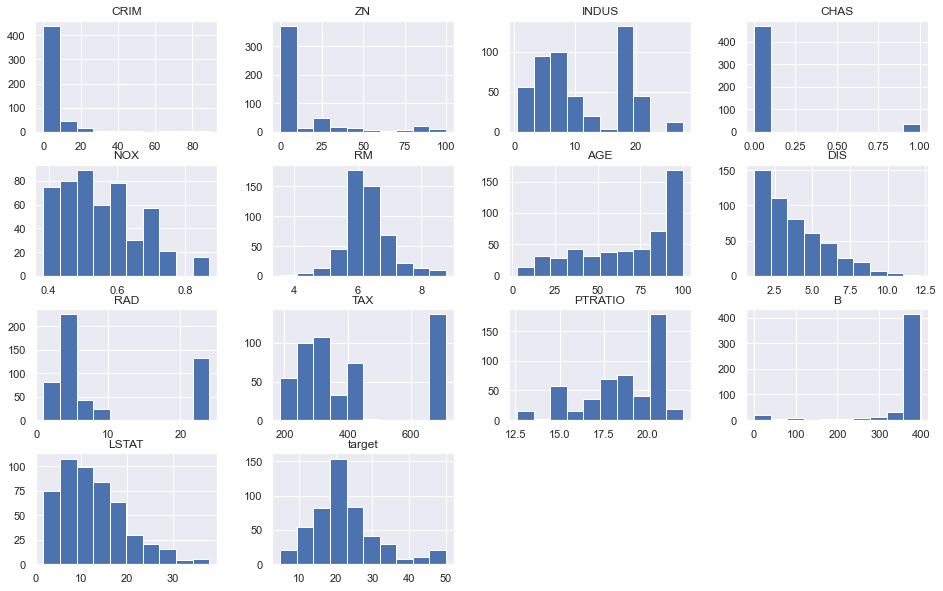

In [9]:
df.hist(figsize=(16,10))
plt.show()

# 학습

## 데이터 분리

In [10]:
y = df['target']
X = df.drop(['target'], axis=1)

In [11]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=1414)

# 모델
* 랏쏘 : L1규제 -->  x|w|  중요하지 않은 피쳐의 회귀계수를 0으로 만들수 있다.
* 릿지 : L2규제 -->  xw^2  중요하지 않은 피쳐의 회귀계수를 0에 가깝게 만든다.(피쳐가 없어지진 않는다)
* ElasicNet , XGBoostRegressor , LightGBMRegressor, *TreeRegressor
* LogisticRegressor는 분류모델이다 ******

* ref : https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBRegressor

## 평가 매트릭스 
* 잔차제곱합의평균 ( MSE )  -- SSR -- RMSL RMSLE  MAE LogLoss
*    E    S   M

<pre>
‘neg_mean_absolute_error’      metrics.mean_absolute_error
‘neg_     mean_squared_error’  metrics.mean_squared_error()
‘neg_root_mean_squared_error’  metrics.mean_squared_error(squared=False)
‘neg_mean_squared_log_error’   metrics.mean_squared_log_error
---
‘neg_log_loss’                 metrics.log_loss (분류)
</pre>

## 1차 점수확인 : 무조건 점수부터 보자(결측x, object X)

In [12]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.linear_model import RidgeClassifier
#L1
lasso_model = Lasso(alpha=10.0, normalize=False,  random_state=1414, max_iter=1000)
#L2
ridge_model = Ridge(alpha=10.0, normalize=False,  random_state=1414, max_iter=None)
#L1(r):L2(1-r)
elastic_moel = ElasticNet(alpha=1.0, normalize=False, random_state=1414, max_iter=1000, l1_ratio=0 )
print(elastic_moel.get_params().keys())


dict_keys(['alpha', 'copy_X', 'fit_intercept', 'l1_ratio', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])


In [13]:
models = [lasso_model, ridge_model, elastic_moel]
for model in models:
    model.fit(X_train,  y_train,)
    pred = model.predict(X_test)
    mse  = mean_squared_error(y_test, pred)
    rmse = mean_squared_error(y_test, pred, squared=False)
    print(f"{model.__class__.__name__}\t MSE:{mse:.4f} RMSE:{rmse:.4f}")
    

Lasso	 MSE:53.1806 RMSE:7.2925
Ridge	 MSE:35.3242 RMSE:5.9434
ElasticNet	 MSE:37.6954 RMSE:6.1397


In [14]:
# alpha=1.0
# Lasso	 MSE:39.0914 RMSE:6.2523  + 1 
# Ridge	 MSE:34.6178 RMSE:5.8837  1  w 
# alpha=0
# Lasso	 MSE:34.2563 RMSE:5.8529  + 0
# Ridge	 MSE:34.2563 RMSE:5.8529  0  w
# alpha=10.0
# Lasso	 MSE:53.1806 RMSE:7.2925   + 10
# Ridge	 MSE:35.3242 RMSE:5.9434   10 w

### 규제 변화에 따른 분산, 편향, 가중치
* intercept_ : float or ndarray of shape (n_targets,)
* coef_ : ndarray of shape (n_features,) or (n_targets, n_features) Weight vector(s).

In [15]:
X_train.columns.values

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype=object)

In [16]:
model.coef_

array([-0.07307956,  0.05414576, -0.02206419,  0.14167072, -0.03882176,
        0.99380704,  0.01861065, -0.77807621,  0.25953617, -0.01601377,
       -0.79515065,  0.00906677, -0.73586704])

0.01 RMSE:5.8698
30.35688149213565


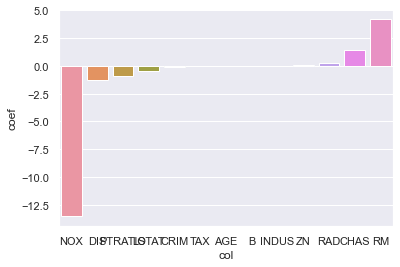

[-8.67035793e-02  4.35937327e-02  3.44614917e-02  1.43057613e+00
 -1.35410624e+01  4.24244991e+00 -3.39632650e-03 -1.29654791e+00
  2.41916287e-01 -1.26851529e-02 -9.35181612e-01  1.05089491e-02
 -4.94402239e-01]
0 RMSE:5.8529
32.54509640645095


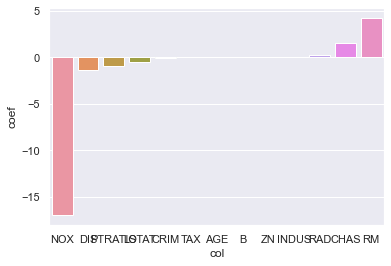

[-8.87363259e-02  4.31259077e-02  4.97820875e-02  1.57751077e+00
 -1.69788138e+01  4.24341501e+00 -5.61371436e-04 -1.34742559e+00
  2.50531860e-01 -1.23959553e-02 -9.71471053e-01  1.03767729e-02
 -4.89424488e-01]
1 RMSE:6.2523
38.939786257809104


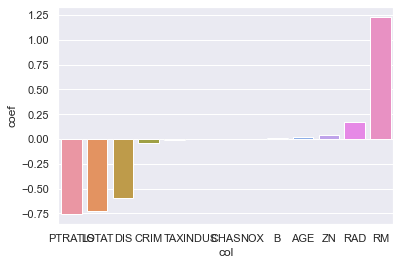

[-0.0433166   0.0443276  -0.          0.         -0.          1.23318949
  0.01718809 -0.59725928  0.17627666 -0.01297778 -0.7593418   0.00895454
 -0.72368651]
1.5 RMSE:6.5287
45.021514967890184


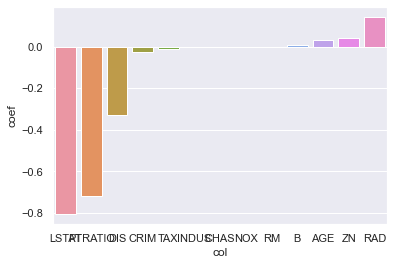

[-0.02410344  0.04155793 -0.          0.         -0.          0.
  0.0318317  -0.33111987  0.14376214 -0.01157516 -0.71710014  0.00793
 -0.80809281]
2 RMSE:6.7052
41.31221813598378


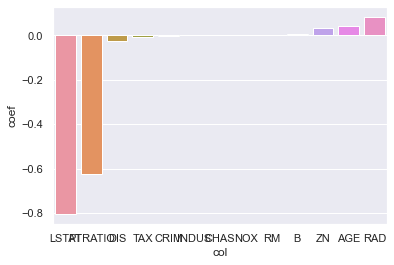

[-0.00482487  0.03189841 -0.          0.         -0.          0.
  0.03966509 -0.02431205  0.08295313 -0.00899811 -0.62526757  0.00750765
 -0.80616953]
2.5 RMSE:6.8022
38.58751870999201


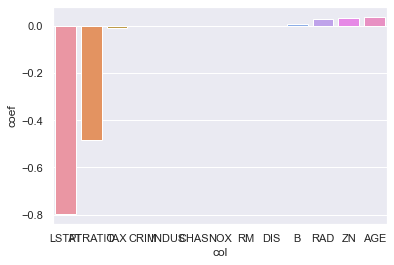

[-0.          0.03304373 -0.          0.         -0.          0.
  0.03846539 -0.          0.03018511 -0.00741494 -0.48442693  0.00710025
 -0.79927363]
3 RMSE:6.8741
36.14498437777185


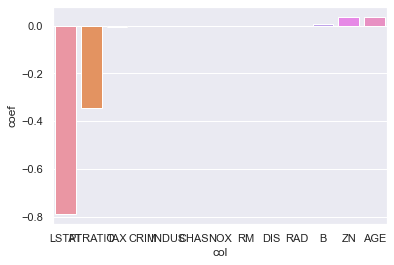

[-0.          0.03538824 -0.          0.          0.          0.
  0.03670156 -0.          0.         -0.00684674 -0.34331081  0.00675644
 -0.79044543]


In [17]:
#L1
alphas = [.01,  0,  1, 1.5, 2, 2.5, 3]
for a in alphas:
    model = Lasso(alpha=a, normalize=False,  random_state=1414, max_iter=1000)
    model.fit(X_train,  y_train,)
    df = pd.DataFrame({"col":X_train.columns.values, "coef":model.coef_ })
    
    pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, pred, squared=False)
    print(f"{a} RMSE:{rmse:.4f}")
    print(model.intercept_)
    sns.barplot(data=df.sort_values(by='coef'), y='coef' , x="col")
    plt.show()
    print(df['coef'].values)
    

0.01 RMSE:5.8531
32.45025527218269


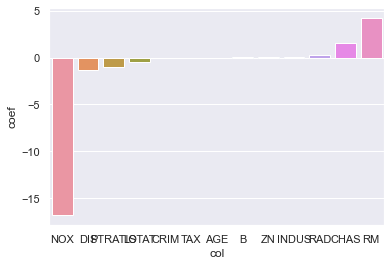

[-8.86572457e-02  4.31493390e-02  4.91451234e-02  1.57710983e+00
 -1.68385928e+01  4.24413567e+00 -6.95796820e-04 -1.34553093e+00
  2.50167309e-01 -1.24064888e-02 -9.69912515e-01  1.03819385e-02
 -4.89569641e-01]
0 RMSE:5.8529
32.54509640645068


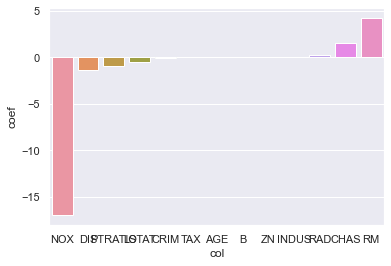

[-8.87363259e-02  4.31259077e-02  4.97820875e-02  1.57751077e+00
 -1.69788138e+01  4.24341501e+00 -5.61371436e-04 -1.34742559e+00
  2.50531860e-01 -1.23959553e-02 -9.71471053e-01  1.03767729e-02
 -4.89424488e-01]
1 RMSE:5.8837
27.471420387161537


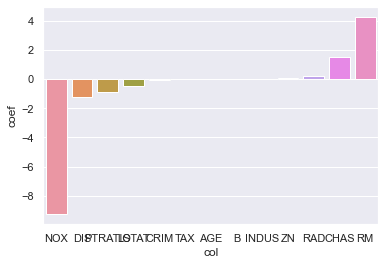

[-8.44234679e-02  4.44827870e-02  1.47711873e-02  1.53165026e+00
 -9.26654612e+00  4.26556035e+00 -7.80414607e-03 -1.24321200e+00
  2.31025715e-01 -1.29993098e-02 -8.86838258e-01  1.06555292e-02
 -4.98648746e-01]
1.5 RMSE:5.8952
26.43053525000291


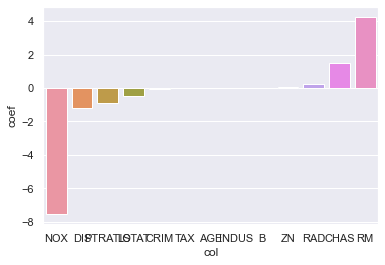

[-8.34859942e-02  4.48258403e-02  6.99955221e-03  1.50757595e+00
 -7.55261825e+00  4.25981283e+00 -9.32226961e-03 -1.22004171e+00
  2.27016232e-01 -1.31476125e-02 -8.68677913e-01  1.07140916e-02
 -5.01454656e-01]
2 RMSE:5.9040
25.762599389514744


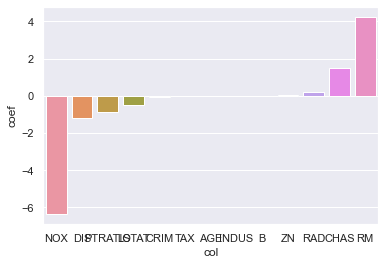

[-8.28521249e-02  4.50846303e-02  1.65795260e-03  1.48378464e+00
 -6.37423686e+00  4.24995677e+00 -1.03157224e-02 -1.20410033e+00
  2.24435095e-01 -1.32571495e-02 -8.56539692e-01  1.07523969e-02
 -5.03801630e-01]
2.5 RMSE:5.9109
25.315763988029648


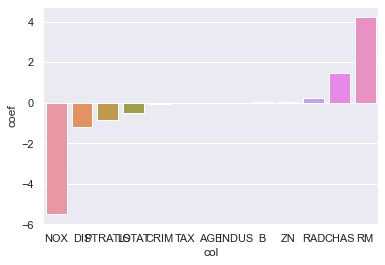

[-8.23981076e-02  4.52930454e-02 -2.24068752e-03  1.46049701e+00
 -5.51428818e+00  4.23772000e+00 -1.09979129e-02 -1.19245396e+00
  2.22698700e-01 -1.33433854e-02 -8.47972047e-01  1.07786288e-02
 -5.05871003e-01]
3 RMSE:5.9164
25.01050219446219


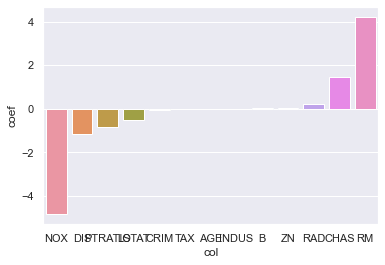

[-0.08205916  0.04546884 -0.00521323  1.43780749 -4.85904651  4.22400724
 -0.0114806  -1.18356585  0.22150157 -0.01341443 -0.84169133  0.01079708
 -0.50775781]


In [18]:
#L2
alphas = [.01,  0,  1, 1.5, 2, 2.5, 3]
for a in alphas:
    model = Ridge(alpha=a, normalize=False,  random_state=1414, max_iter=1000)
    model.fit(X_train,  y_train,)
    df = pd.DataFrame({"col":X_train.columns.values, "coef":model.coef_ })
    
    pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, pred, squared=False)
    print(f"{a} RMSE:{rmse:.4f}")
    print(model.intercept_)
    sns.barplot(data=df.sort_values(by='coef'), y='coef' , x="col")
    plt.show()
    print(df['coef'].values)


## Voting 앙상블

In [19]:
lr = LinearRegression(fit_intercept=True, normalize=False)
rf = RandomForestRegressor(n_estimators=100,
                 criterion="mse",   #{"mse", "mae"}, default="mse"
                 max_depth=None,
                 min_samples_split=2,
                 min_samples_leaf=1,
                 bootstrap=True,
                 oob_score=False,
                 random_state=1414)

#L1
lasso_model = Lasso(alpha=1.0, normalize=False,  random_state=1414, max_iter=1000)
#L2
ridge_model = Ridge(alpha=1.0, normalize=False,  random_state=1414, max_iter=None)
#L1(r):L2(1-r)
elastic_moel = ElasticNet(alpha=1.0, normalize=False, random_state=1414, max_iter=1000, l1_ratio=0.7 )
print(elastic_moel.get_params().keys())

#estimators : list of (str, estimator) tuples
voting_model = VotingRegressor( estimators=[("LR", lr),("FOREST", rf),
                                      ("LASSO", lasso_model),
                                      ("RIDGE", ridge_model)])

voting_model.fit(X_train, y_train)
pred = voting_model.predict(X_test)
# rmse = mean_squared_error(y_test, pred, squared=False)
# print(f"{a} MSE:{np.square(rmse):.4f}  RMSE:{rmse:.4f}")

mse = mean_squared_error(y_test, pred, squared=True)
print(f"{a} MSE:{mse:.4f}  RMSE:{np.sqrt(mse):.4f}")



dict_keys(['alpha', 'copy_X', 'fit_intercept', 'l1_ratio', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])
3 MSE:28.1640  RMSE:5.3070


In [22]:
# 원본
# 3 MSE:28.1640  RMSE:5.3070



# ------------------- 원본 -------------
# Lasso	 MSE:53.1806 RMSE:7.2925
# Ridge	 MSE:35.3242 RMSE:5.9434
# ElasticNet	 MSE:37.6954 RMSE:6.1397

# --------------------앙상블1차 ---------------
# voting_model = VotingRegressor( estimators=[("LR", lr),("FOREST", rf),
#                                       ("LASSO", lasso_model),
#                                       ("RIDGE", ridge_model)])

# --------------------앙상블2차 ---------------
# voting_model = VotingRegressor( estimators=[("forest", rf),
#                                       ("dt", dt),
#                                       ("xgboost", xgboost),
#                                       ("lgbm", lgbm)     
#                                     ])
# MSE:37.6954  RMSE:6.1397


In [23]:
dt = DecisionTreeRegressor()
xgboost = XGBRegressor()
lgbm = LGBMRegressor()


#estimators : list of (str, estimator) tuples
voting_model = VotingRegressor( estimators=[("forest", rf),
                                      ("dt", dt),
                                      ("xgboost", xgboost),
                                      ("lgbm", lgbm)     
                                    ])

voting_model.fit(X_train, y_train)
pred = voting_model.predict(X_test)

mse = mean_squared_error(y_test, pred, squared=True)
print(f"{a} MSE:{mse:.4f}  RMSE:{np.sqrt(mse):.4f}")



3 MSE:16.5901  RMSE:4.0731


## Bagging 앙상블

In [24]:
bagging_model = BaggingRegressor(base_estimator=xgboost,  # None = DecisionTreeRegressor.
                 n_estimators=10,
                 max_samples=1.0,
                 max_features=1.0,
                 bootstrap=True,
                 oob_score=False,
                 random_state=1414)
bagging_model.fit(X_train, y_train)
pred = bagging_model.predict(X_test)
mse = mean_squared_error(y_test, pred, squared=True)
print(f"{a} MSE:{mse:.4f}  RMSE:{np.sqrt(mse):.4f}")

3 MSE:19.5802  RMSE:4.4249


## Boosting 앙상블 

In [25]:
# bagging_model = GradientBoostingRegressor()
# bagging_model.fit(X_train, y_train)
# pred = bagging_model.predict(X_test)
# mse = mean_squared_error(y_test, pred, squared=False)
# print(f"{a} MSE:{mse:.4f}  RMSE:{np.sqrt(mse):.4f}")
# #3 MSE:3.2558  RMSE:1.8044

In [26]:
# 기본트리 DecisionTreeRegressor 를 가중치를 주면서 학습 : 모델 강화
boosting_model = GradientBoostingRegressor(loss='ls', learning_rate=0.1, n_estimators=100,
                 subsample=1.0, criterion='friedman_mse',  #{'friedman_mse', 'mse', 'mae'}
                          random_state=1414, alpha=0.9)
boosting_model.fit(X_train, y_train)
pred = boosting_model.predict(X_test)
mse = mean_squared_error(y_test, pred, squared=True)
mse = mean_squared_error(y_test, pred, squared=True)
r2 = r2_score(y_test, pred)
print(f"{a} MSE:{mse:.4f}  RMSE:{np.sqrt(mse):.4f}  R2:{r2:.4f}")

3 MSE:9.8625  RMSE:3.1405  R2:0.8906


## PipeLine 
* Preprocessing and Normalization  -- step list

In [27]:
from sklearn.pipeline import Pipeline
ss = StandardScaler()
pipe = Pipeline(steps=[
                        #("ENCODING",LabelEncoder()),
                        ("SCALER", ss),
                        ("MODELFIT",boosting_model)
                      ]
                )
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)  #R2, Accuracy

0.8906085633048834